In [21]:
import nltk
from nltk.corpus import stopwords

In [22]:
from nltk.tokenize import punkt

In [23]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, SGDRegressor
import numpy as np
import pandas as pd
from os import chdir

In [24]:
stop_words = set(stopwords.words('english')) 

In [25]:
chdir('C:/Users/Shuya C/Desktop/depaul/DSC478/finalproject')

In [26]:
df_train=pd.read_csv('train.csv',sep=',')
subm_df=pd.read_csv('sample_submission.csv',sep=',')

In [27]:
from string import punctuation
from nltk import word_tokenize 

In [28]:
df_train['comment_text'] = df_train.comment_text.apply(lambda x: x.lower())

In [29]:
df_train['comment_text']

0          this is so cool. it's like, 'would you want yo...
1          thank you!! this would make my life a lot less...
2          this is such an urgent design problem; kudos t...
3          is this something i'll be able to install on m...
4                       haha you guys are a bunch of losers.
5                                       ur a sh*tty comment.
6                                hahahahahahahahhha suck it.
7                                        ffffuuuuuuuuuuuuuuu
8          the ranchers seem motivated by mostly by greed...
9          it was a great show. not a combo i'd of expect...
10                                   wow, that sounds great.
11         this is a great story. man. i wonder if the pe...
12            this seems like a step in the right direction.
13         it's ridiculous that these guys are being call...
14         this story gets more ridiculous by the hour! a...
15         i agree; i don't want to grant them the legiti...
16         interesting. 

In [31]:
df_train['cleaned_comment'] = df_train.comment_text.apply(lambda x: word_tokenize(x))

In [32]:
df_train['cleaned_comment'] = df_train.cleaned_comment.apply(lambda x: [word for word in x if word not in stop_words])

In [33]:
df_train['cleaned_comment'] = df_train.cleaned_comment.apply(lambda x: ' '.join(x))

In [42]:
def remove_punctuation(comments):
    '''
    remove punctuation
    '''
    punctuation = "/-'?!.,#$%\'()*+-/:;<=>@[\\]^_`{|}~`" + '""“”’' + '∞θ÷α•à−β∅³π‘₹´°£€\×™√²—–&'
    def clean_special_chars(text, punctuation):
        for p in  punctuation:
            text = text.replace(p, ' ')
        return text
    comments = comments.astype(str).apply(lambda x: clean_special_chars(x, punctuation))
    return comments

In [43]:
df_train['cleaned_comment']=remove_punctuation(df_train['cleaned_comment'])

In [34]:
df_train.drop('comment_text',axis=1,inplace=True)

In [44]:
df_train.fillna(0,inplace=True)

In [45]:
df_train.head()

,id,target,severe_toxicity,obscene,identity_attack,insult,threat,asian,atheist,bisexual,...,rating,funny,wow,sad,likes,disagree,sexual_explicit,identity_annotator_count,toxicity_annotator_count,cleaned_comment
0,59848,0.000000,0.000000,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,...,rejected,0,0,0,0,0,0.0,0,4,cool s like would want mother read ...
1,59849,0.000000,0.000000,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,...,rejected,0,0,0,0,0,0.0,0,4,thank would make life lot less anxiety ind...
2,59852,0.000000,0.000000,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,...,rejected,0,0,0,0,0,0.0,0,4,urgent design problem kudos taking impress...
3,59855,0.000000,0.000000,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,...,rejected,0,0,0,0,0,0.0,0,4,something ll able install site releasing
4,59856,0.893617,0.021277,0.0,0.021277,0.87234,0.0,0.0,0.0,0.0,...,rejected,0,0,0,1,0,0.0,4,47,haha guys bunch losers


In [70]:
df_test=pd.read_csv('test.csv',sep=',')

In [71]:
df_test['comment_text'] = df_test.comment_text.apply(lambda x: x.lower())

,id,comment_text
0,7000000,Jeff Sessions is another one of Trump's Orwell...
1,7000001,I actually inspected the infrastructure on Gra...
2,7000002,No it won't . That's just wishful thinking on ...
3,7000003,Instead of wringing our hands and nibbling the...
4,7000004,how many of you commenters have garbage piled ...


In [72]:
df_test['comment_text'] = df_test.comment_text.apply(lambda x: x.lower())
df_test['cleaned_comment'] = df_test.comment_text.apply(lambda x: word_tokenize(x))
df_test['cleaned_comment'] = df_test.cleaned_comment.apply(lambda x: [word for word in x if word not in stop_words])
df_test['cleaned_comment'] = df_test.cleaned_comment.apply(lambda x: ' '.join(x))

In [73]:
df_test['cleaned_comment']=remove_punctuation(df_test['cleaned_comment'])

In [74]:
df_test.drop('comment_text',axis=1,inplace=True)
df_test.head()

,id,cleaned_comment
0,7000000,jeff sessions another one trump s orwellian c...
1,7000001,actually inspected infrastructure grand chief ...
2,7000002,wo n t s wishful thinking democrats fault ...
3,7000003,instead wringing hands nibbling periphery issu...
4,7000004,many commenters garbage piled high yard bald...


In [75]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

In [76]:
y = np.where(df_train['target'] >= 0.5, 1, 0)
print(y.shape)
y

(1804874,)


array([0, 0, 0, ..., 0, 1, 0])

In [90]:
count_vect = CountVectorizer(stop_words="english")

In [105]:
x=count_vect.fit_transform(df_train['cleaned_comment'])

In [106]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=21)

In [107]:
test_x = count_vect.transform(df_test['cleaned_comment'])
test_x

<97320x308468 sparse matrix of type '<class 'numpy.int64'>'
	with 2082710 stored elements in Compressed Sparse Row format>

# Naive Bayes

In [97]:
from sklearn.naive_bayes import MultinomialNB

In [98]:
clfrNB = MultinomialNB(alpha = 0.1)

In [109]:
clfr_nb=clfrNB.fit(x_train, y_train)

In [110]:
y_pred = clfr_nb.predict(x_test)

In [112]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split,cross_val_score

In [113]:
cv_accuracy = cross_val_score(clfrNB, x, y, cv=5,scoring = 'roc_auc')
print(cv_accuracy)

[0.85397306 0.8502629  0.84690677 0.855935   0.85479617]


In [114]:
print('average accuracy of 5 cross validation: ',cv_accuracy.mean())

average accuracy of 5 cross validation:  0.8523747779007984


In [119]:
test_pred=clfrNB.predict_proba(test_x)
pred=test_pred[:,-1]
pred.astype(float)

array([1.14925096e-01, 1.16916477e-07, 4.11065249e-02, ...,
       2.29315168e-02, 9.63883253e-01, 7.70895402e-02])

In [120]:
acc=accuracy_score(y_test, y_pred)
print('accuracy score: ',acc)

accuracy score:  0.8852818697794197


In [121]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.91      0.94    415087
           1       0.37      0.63      0.47     36132

   micro avg       0.89      0.89      0.89    451219
   macro avg       0.67      0.77      0.70    451219
weighted avg       0.92      0.89      0.90    451219



In [122]:
import pylab as plt
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[376567  38520]
 [ 13243  22889]]


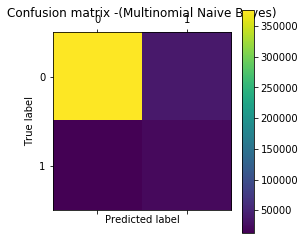

In [123]:
# Show confusion matrix 
plt.matshow(cm)
plt.title('Confusion matrix -(Multinomial Naive Bayes)')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [127]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thr = roc_curve(y_test, clfrNB.predict_proba(x_test)[:,1])
auc = auc(fpr, tpr)

In [128]:
def plot_roc_curve(fpr, tpr):  
    plt.plot(fpr, tpr, color='red',  label="ROC curve (area = %0.4f)" % auc)
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()
    plt.show()

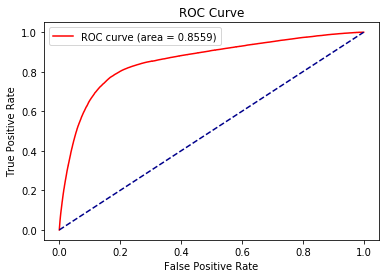

In [129]:
plot_roc_curve(fpr, tpr)

Counter({0: 1660540, 1: 144334})


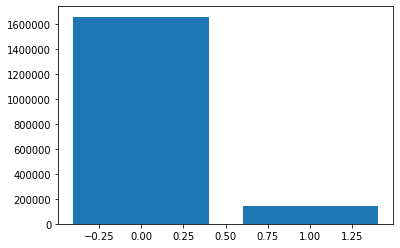

In [135]:
import collections
import matplotlib.pyplot as plt
toxic=collections.Counter(y)
plt.bar(toxic.keys(), toxic.values())
print(toxic)
plt.show()

Reference:
    
https://scikit-learn.org/stable/modules/naive_bayes.html
    
https://towardsdatascience.com/multi-class-text-classification-model-comparison-and-selection-5eb066197568